# <h1> Import dataset

In [1]:
# link dataset: https://data.cityofnewyork.us/Transportation/2020-Green-Taxi-Trip-Data/pkmi-4kfn
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/DS105/Do_An/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
#loading dataset
df_step4=pd.read_csv(path+"dataset/finall_data.csv",index_col=False)

# <h1> 4. Trực quan bộ dữ liệu

## <h2> 4.1 Trực quan dữ liệu đơn biến

In [5]:
df_step4.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag         int64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge      int64
total_amount             float64
payment_type               int64
trip_type                  int64
congestion_surcharge     float64
PU_Borough                object
PU_Zone                   object
PU_service_zone           object
DO_Borough                object
DO_Zone                   object
DO_service_zone           object
trip_duration            float64
pickup_month               int64
pickup_weekday             int64
pickup_hour                int64
dropoff_month              int64
dropoff_we

In [6]:
cat_col=df_step4.select_dtypes(["int64"]).columns
cat_col

Index(['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'improvement_surcharge',
       'payment_type', 'trip_type', 'pickup_month', 'pickup_weekday',
       'pickup_hour', 'dropoff_month', 'dropoff_weekday', 'dropoff_hour'],
      dtype='object')

In [7]:
con_col=df_step4.select_dtypes(["float64"]).columns
con_col

Index(['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge',
       'trip_duration'],
      dtype='object')

### <h3> 4.1.1 Trực quan đơn biến liên tục </h3>

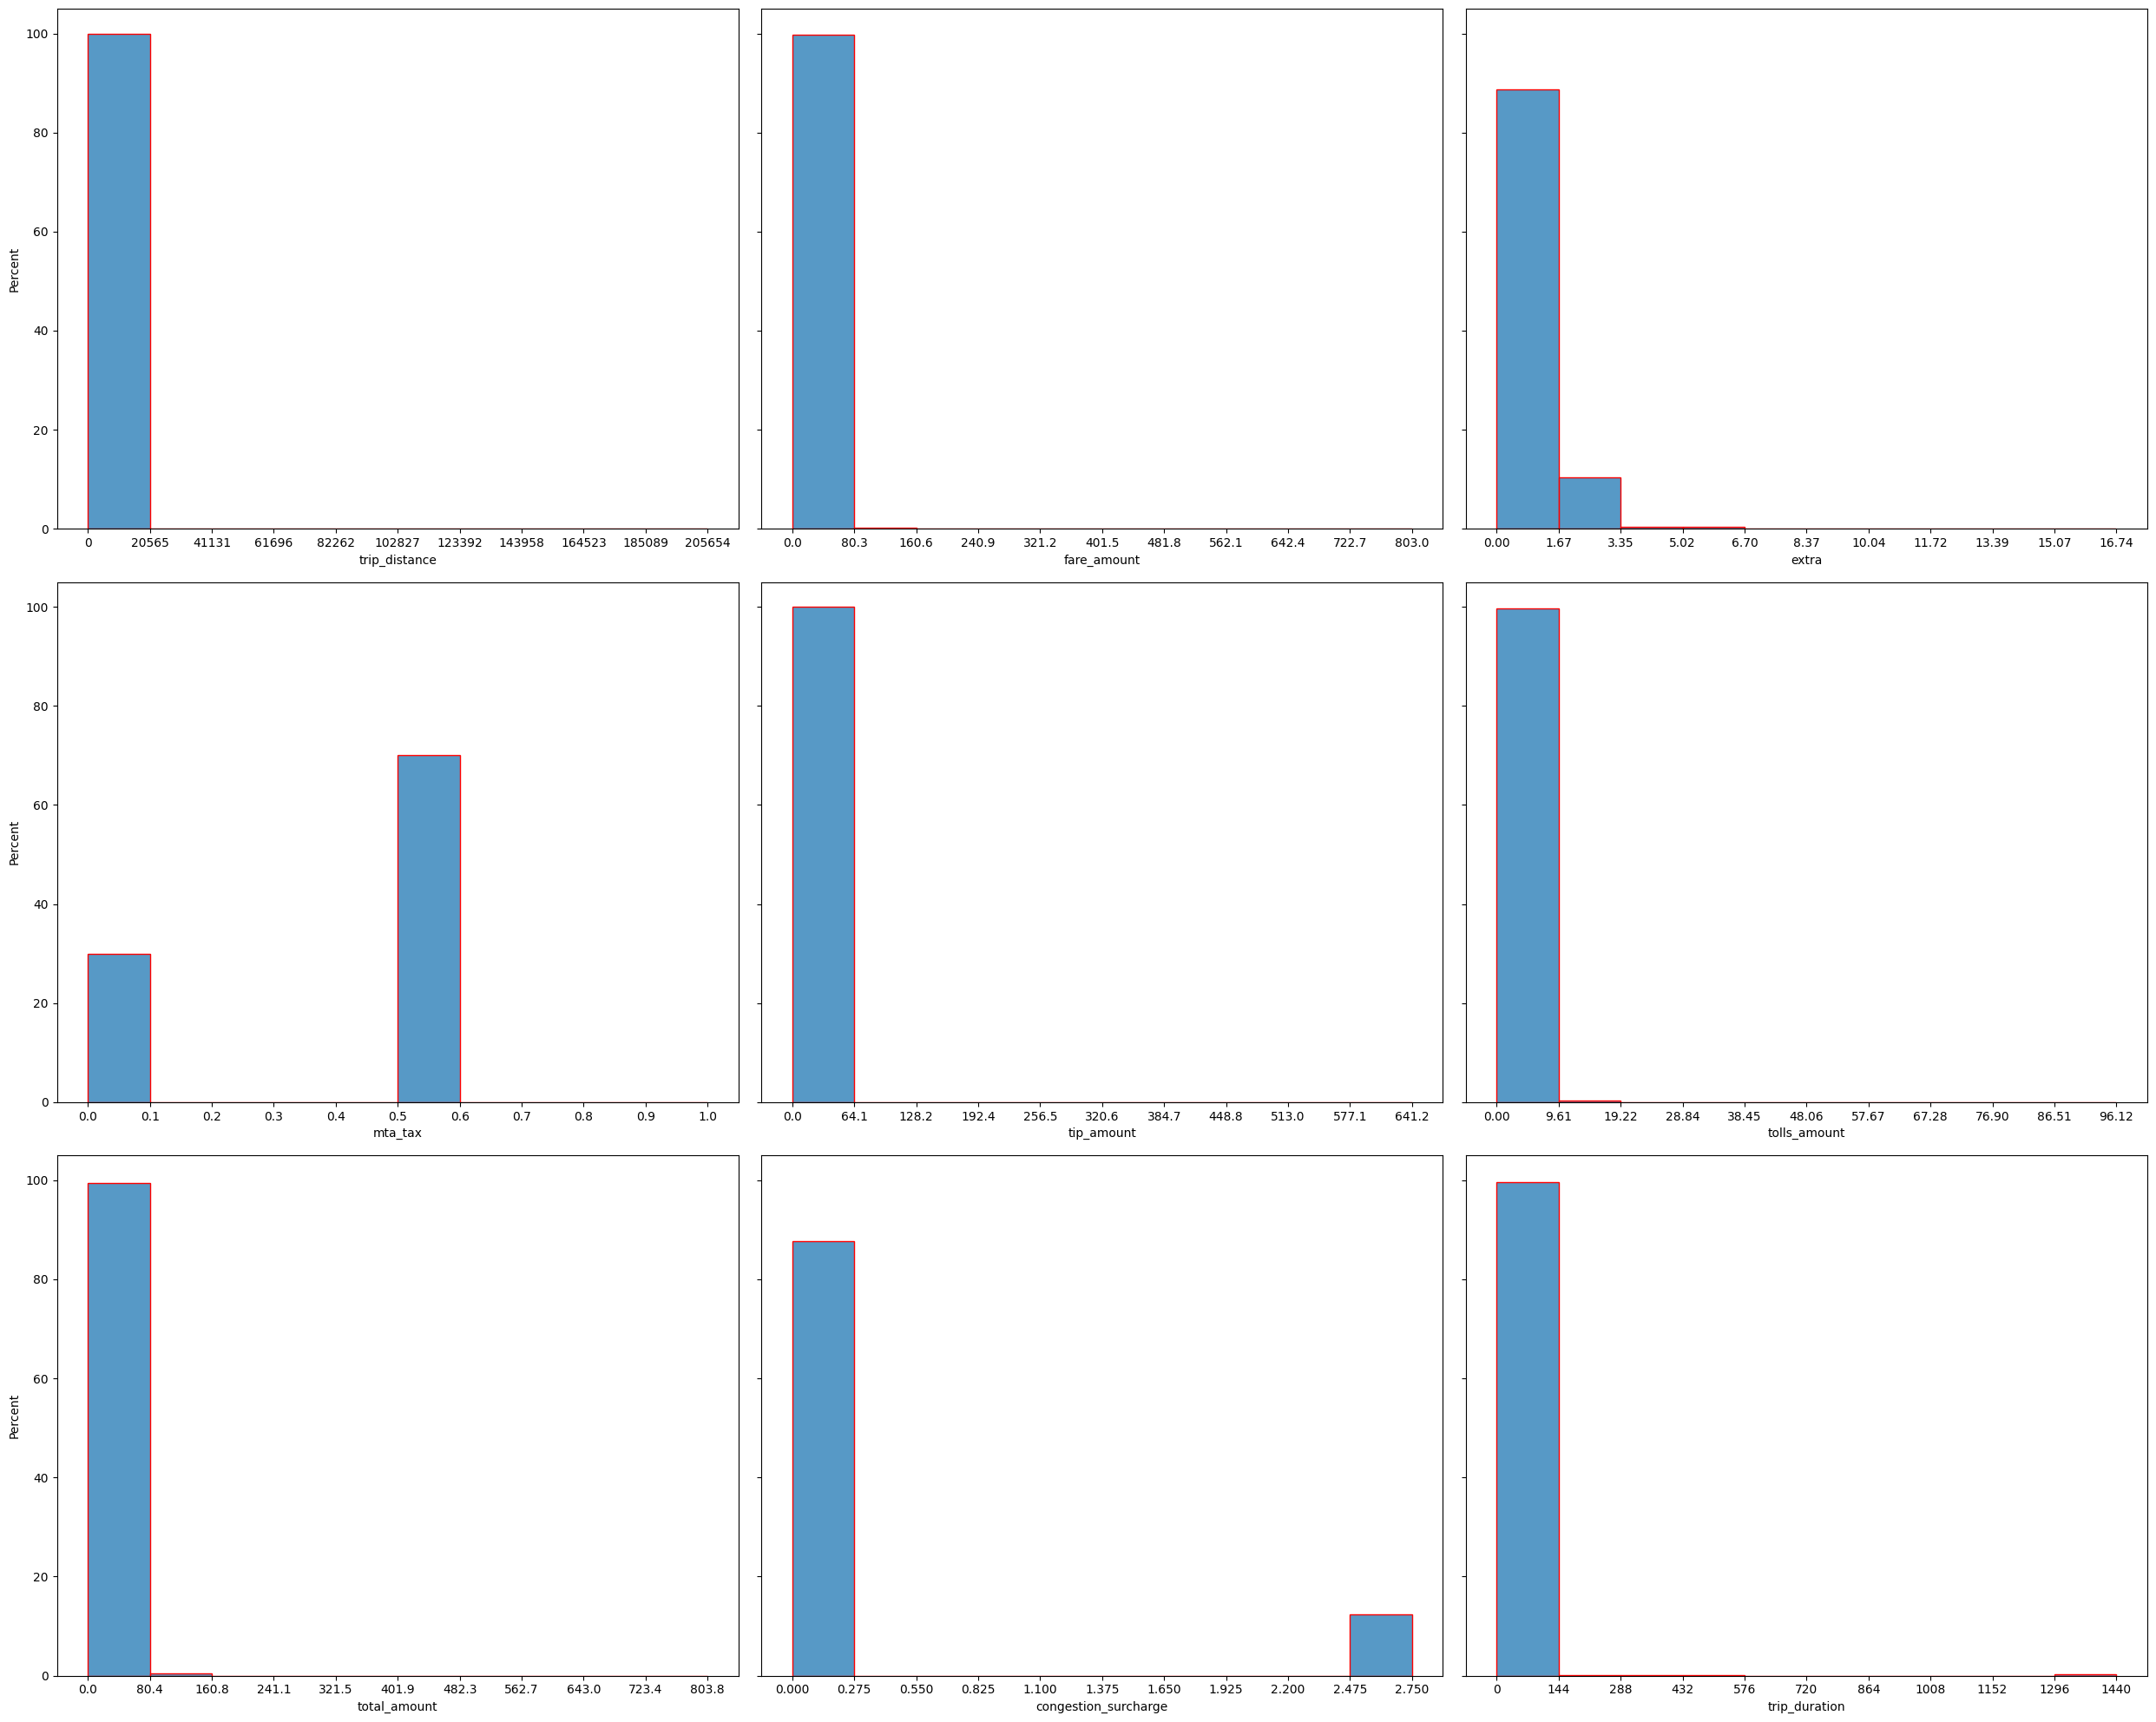

In [8]:
x=con_col
data=df_step4
stat="percent"
f,ax=plt.subplots(round(len(x)/3),3,figsize=(25,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(20,10)})
  p=sns.histplot(x=i,data=data,bins=np.histogram_bin_edges(data[str(i)]),stat=stat, edgecolor='red',kde=False,ax=a)
  a.set_xticks(np.histogram_bin_edges(data[str(i)]))
  # a.hist(x=i,data=data,bins=np.histogram_bin_edges(data[str(i)]))
  p.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()
f.savefig(path+'picture/eda_continuous_variable.png')


In [9]:
con_col

Index(['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge',
       'trip_duration'],
      dtype='object')

In [10]:

for i in con_col:
  sns.set(rc = {'figure.figsize':(15,10)})
  p = sns.histplot(x=i,data=data,bins=np.histogram_bin_edges(data[i]),stat=stat, edgecolor='red',kde=False)
  # ax.ticklabel_format(style='plain')
  p.set_xticks(np.histogram_bin_edges(data[str(i)]))
  plt.title("Histplot "+stat+" of "+ str(i))
  fig=p.get_figure()
  plt.savefig(path+"picture/Histplot "+stat+" of "+ str(i))
  plt.close()


### <h3> 4.1.2 Trực quan đơn biến phân loại </h3>

In [11]:
cat_col_a = [col for col in cat_col if col not in ('DOLocationID','PULocationID','pickup_month',
 'pickup_weekday',
 'pickup_hour',
 'dropoff_month',
 'dropoff_weekday',
 'dropoff_hour')]

In [12]:
cat_col_a

['VendorID',
 'store_and_fwd_flag',
 'RatecodeID',
 'passenger_count',
 'improvement_surcharge',
 'payment_type',
 'trip_type']

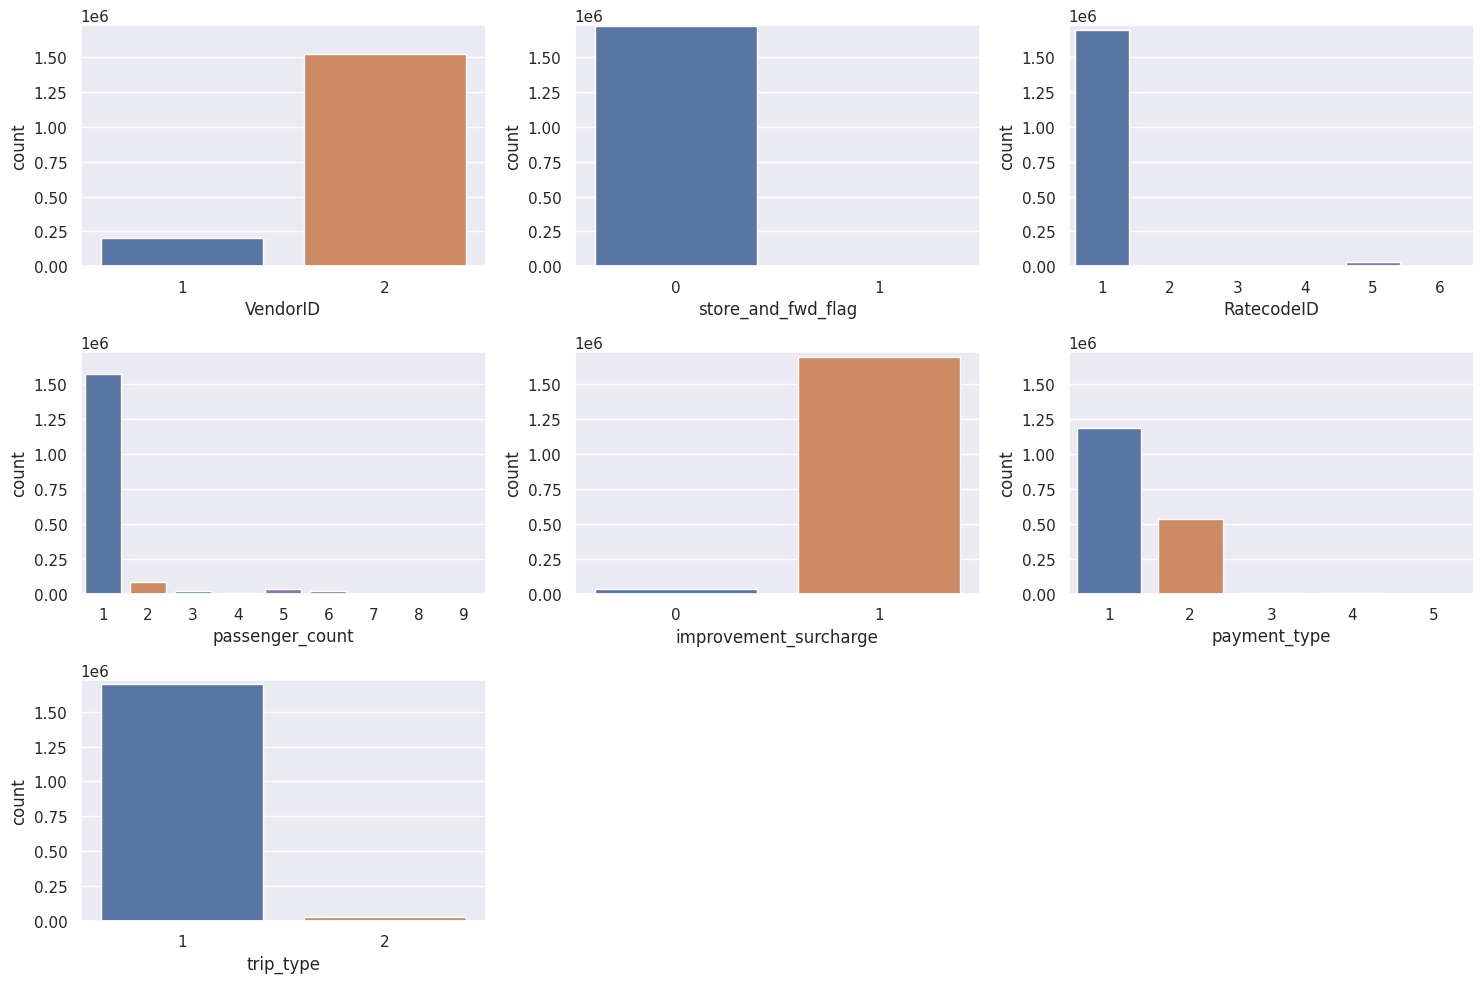

In [24]:

# f,ax=plt.subplots(round(len(x)/3),3,figsize=(20,20),sharey=True)
x=cat_col_a
f=plt.figure(figsize=(15,10))
for i,col in enumerate(x):
  ax=f.add_subplot(331+i)
  sns.set(rc = {'figure.figsize':(8,8)})
  sns.countplot(x=col,data=data)
  ax.set_ylim(0,data.shape[0])

plt.tight_layout()
plt.show()
f.savefig(path+'picture/eda_categorical_variable.png')

In [25]:
for i in cat_col_a:
  sns.set(rc = {'figure.figsize':(15,10)})
  p = sns.countplot(x=i,data=data)
  # ax.ticklabel_format(style='plain')
  plt.title("Countplot of "+ str(i))
  fig=p.get_figure()
  plt.savefig(path+"picture/Countplot of "+ str(i))
  plt.close()

 Trực quan những cặp đơn biến phân loại có cùng ý nghĩa

In [15]:
cat_col_b=['PU_Borough','DO_Borough','PU_service_zone','DO_service_zone','pickup_month','dropoff_month','pickup_weekday','dropoff_weekday',
       'pickup_hour','dropoff_hour','pickup_bin_hours', 'dropoff_bin_hours']

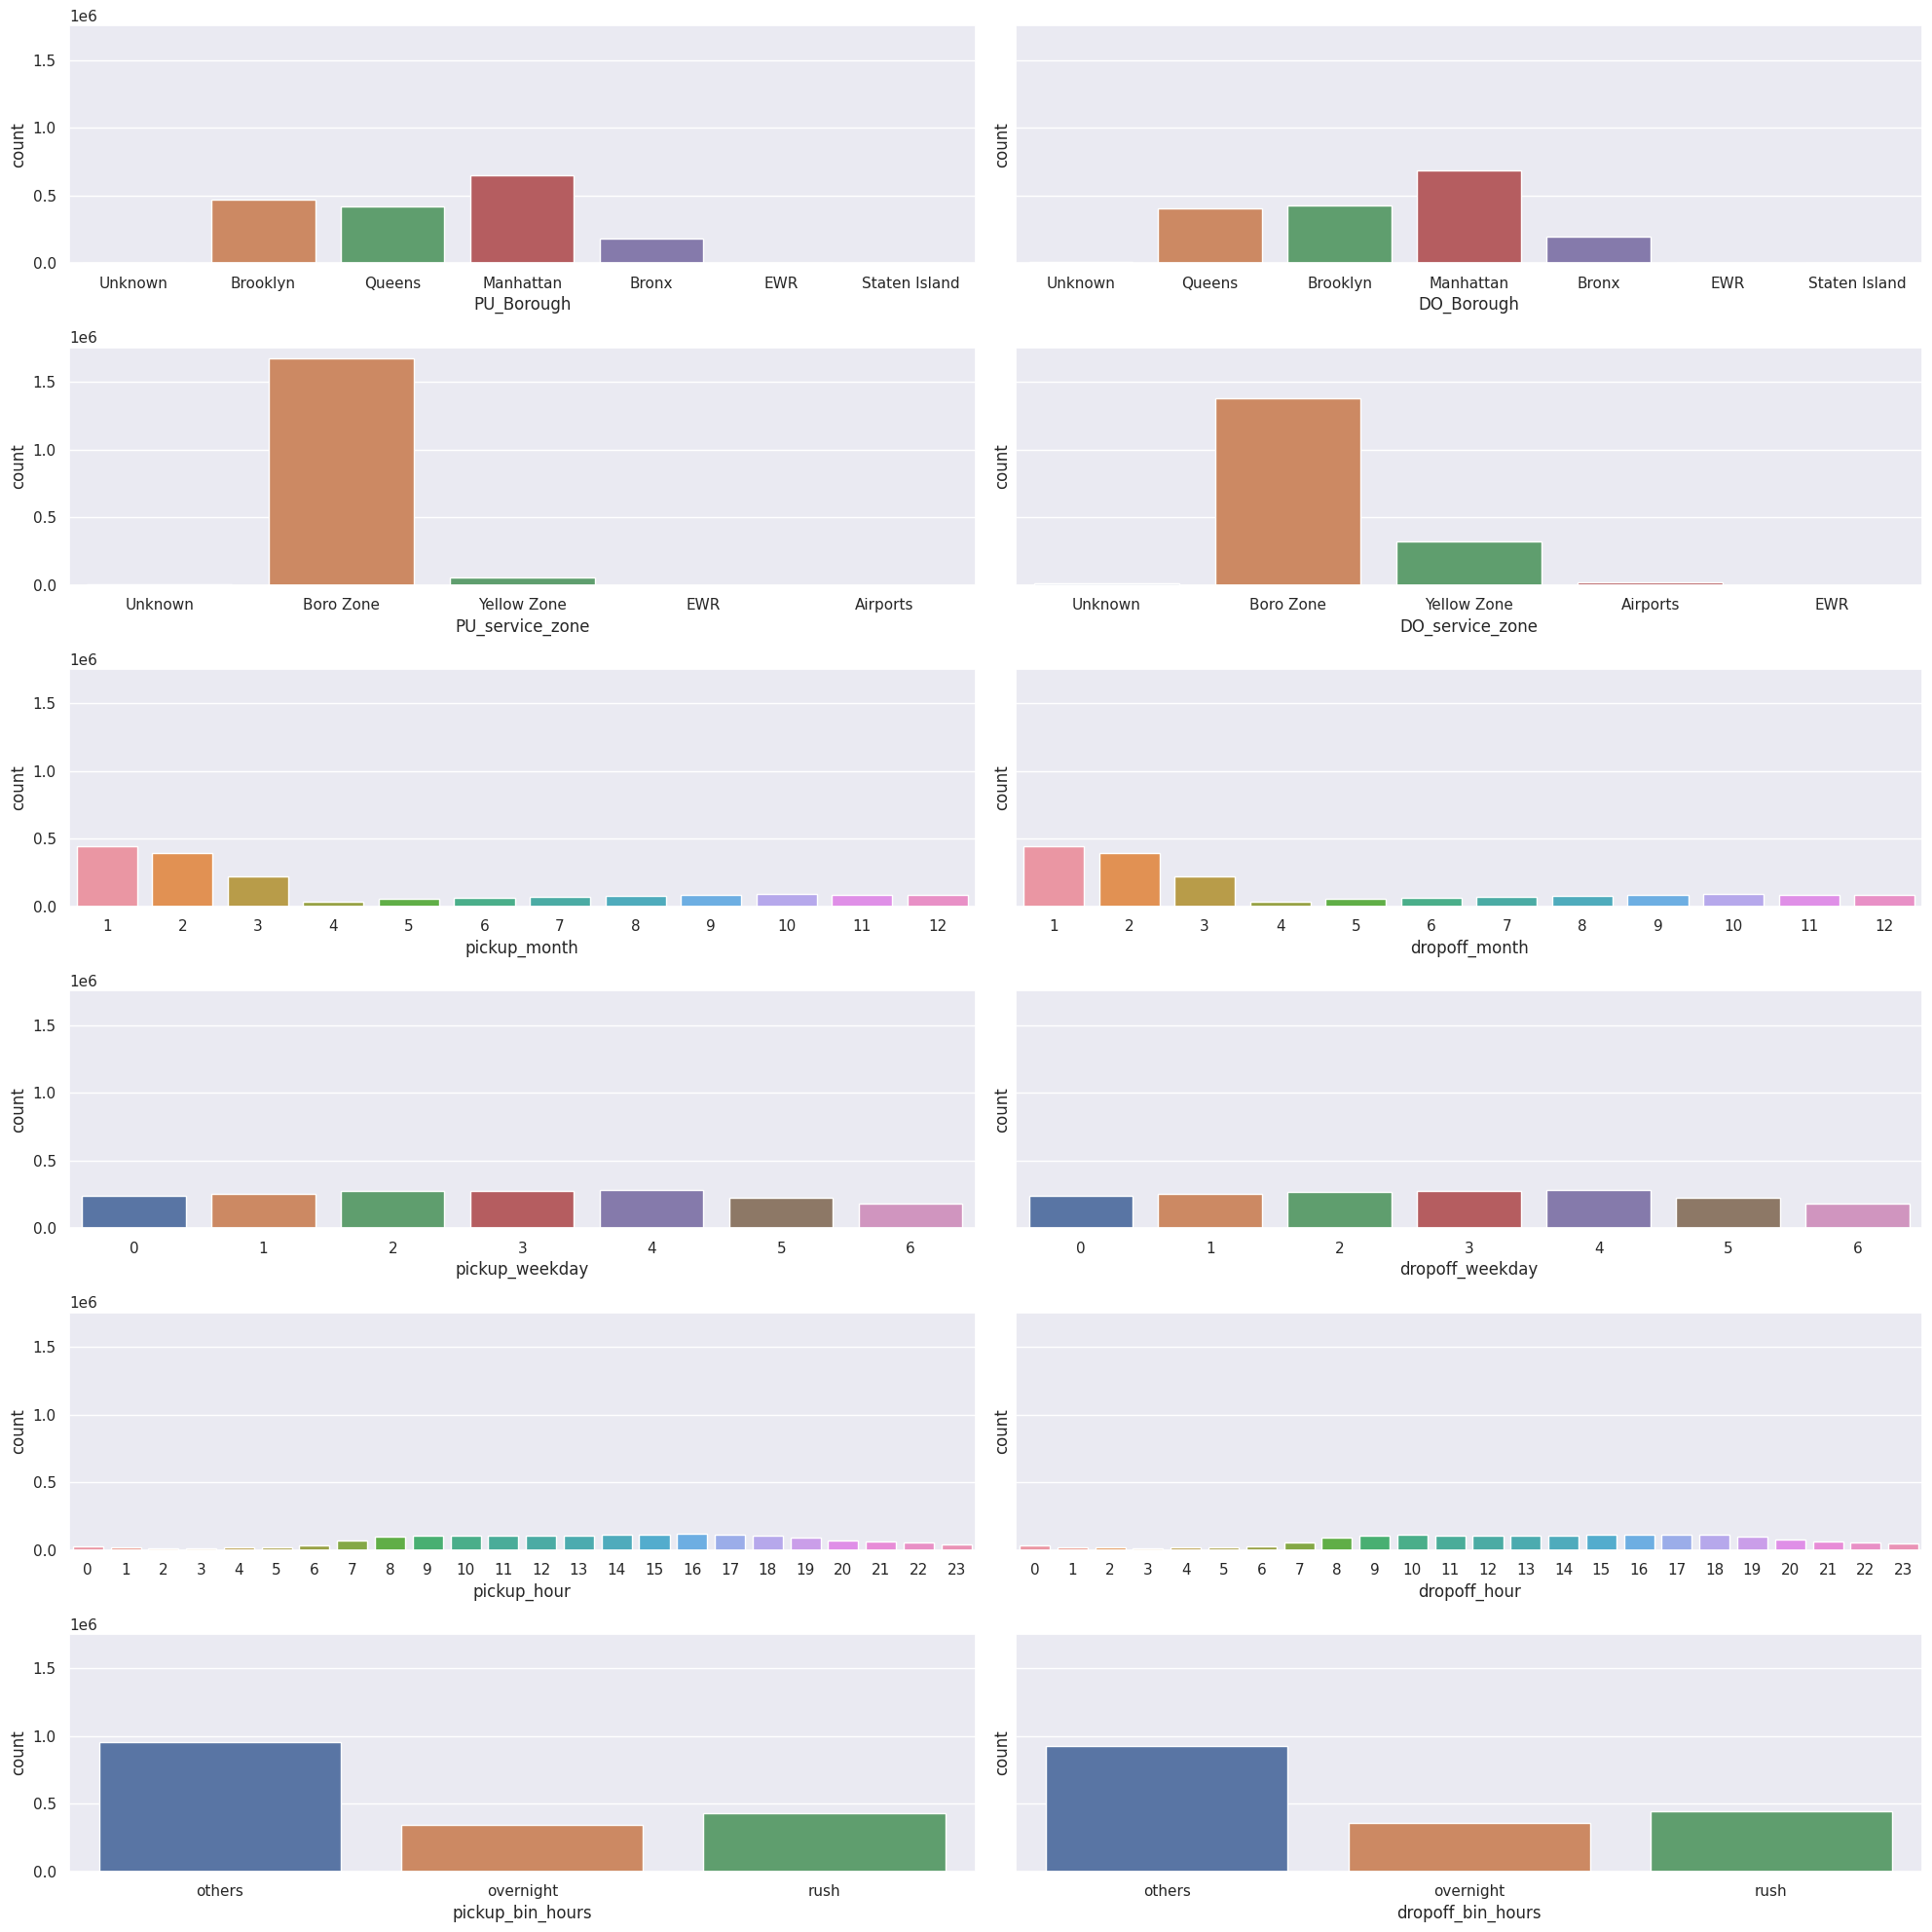

In [16]:

x=cat_col_b
data=df_step4

f,ax=plt.subplots(round(len(x)/2),2,figsize=(20,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(10,10)})
  p=sns.countplot(x=i,data=data,ax=a)

plt.tight_layout()
plt.show()
f.savefig(path+'picture/eda_dual_categorical_variable.png')

In [17]:
for i in cat_col_b:
  sns.set(rc = {'figure.figsize':(15,10)})
  p = sns.countplot(x=i,data=data)
  # ax.ticklabel_format(style='plain')
  plt.title("Countplot of "+ str(i))
  fig=p.get_figure()
  plt.savefig(path+"picture/Countplot of "+ str(i))
  plt.close()